# Ensemble (앙상블)

####  여러 개의 분류기를 생성하고, 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법

#### - 보팅(Voting) : 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
#### - 배깅(Bagging: Bootstrap AGGregatING) : 데이터 샘플링(Bootstrap)을 통해 모델을 학습시키고 결과를 집계(Aggregating) 하는 방법
#### - 부스팅(Boosting) : 여러 개의 분류기가 순차적으로 학습을 수행(다음 분류기에게 가중치를 부스팅)
#### - 스태킹(Stacking: stacked generalization) : 여러 개의 분류기 결과를 취합하는 마지막 예측기(블렌더 또는 메타학습기)를 학습하는 방법


---

## 보팅(Voting)

#### 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식으로 보통 서로 다른 알고리즘을 여러 개 결합하여 사용한다. 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

iris = load_iris()
X = iris["data"][0:100, (0,2)] # 처음 100개의 데이터 중에서 꽃받침 길이, 꽃잎 길이
y = iris["target"][0:100] # 처음 50개는 Iris-setosa, 다음 50개는 Iris-versicolor
y = np.where(y==0, 0, 1) # 만일 Iris-setosa이면 0, 아니면 1로 변경

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

models = [
    ('knn', KNeighborsClassifier()),
    ('svc', SVC(probability=True)),
    ('dtc', DecisionTreeClassifier())
]

# hard vote
hard_vote = VotingClassifier(models, voting='hard')
hard_vote.fit(X_train, y_train)

# soft vote
soft_vote = VotingClassifier(models, voting='soft')
soft_vote.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('svc', SVC(probability=True)),
                             ('dtc', DecisionTreeClassifier())],
                 voting='soft')

### 데이터 준비 

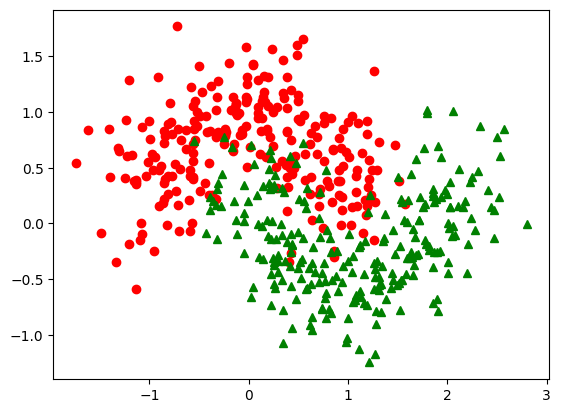

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)  # noise를 많이 줄수록 데이터들이 섞여서 나옴 

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.show()

### 참고 : 데이터를 학습 데이터, 테스트 데이터로 분리 

In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Hard Voting 

#### 직접 보팅 

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=10)
svm_clf = SVC()

models = [('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)]
voting_clf = VotingClassifier(estimators=models, voting='hard')   #하드 보팅 
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


### Soft voting

#### 간접 투표에 해당함 

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=10)
svm_clf = SVC(probability=True)    # SVC는 각 레이블에 대한 확률을 제공하지 않으므로 probability=True로 지정해야 함

models = [('lr', log_clf), ('rf', rnd_clf), ('svm', svm_clf)]
voting_clf = VotingClassifier(estimators=models, voting='soft')  # 소프트 보팅 
voting_clf.fit(X_train, y_train)

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.864
SVC 0.896
VotingClassifier 0.92


### 데이터 준비 

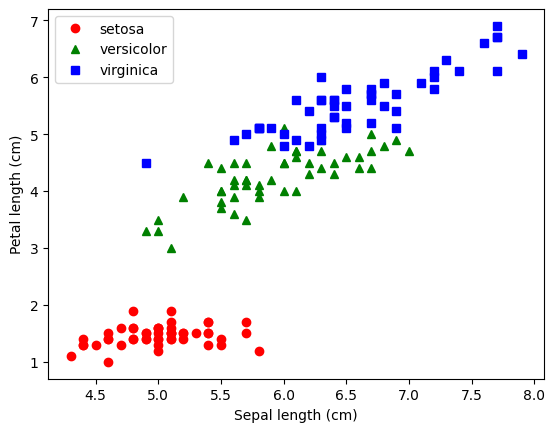

In [6]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [0, 2]] # 꽃받침의 길이와 꽃잎의 길이
y = iris.target

plt.plot(X[:,0][y==0], X[:,1][y==0], "ro", label='setosa')
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^", label='versicolor')
plt.plot(X[:,0][y==2], X[:,1][y==2], "bs", label='virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

### Ensemble(Voting)이 반드시 좋을까?

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

dt_clf = DecisionTreeClassifier(max_depth=4)
knn_clf = KNeighborsClassifier(n_neighbors=7)
svm_clf = SVC(gamma=0.1, probability=True)
models = [('dt', dt_clf), ('knn', knn_clf), ('svm', svm_clf)]
voting_clf = VotingClassifier(models, voting='soft', weights=[2, 1, 2])
voting_clf.fit(X_train, y_train)

for clf in (dt_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: {accuracy_score(y_test,y_pred):.4f}")

DecisionTreeClassifier: 0.9211
KNeighborsClassifier: 0.9211
SVC: 0.8947
VotingClassifier: 0.9211


---

## Bagging (배깅)

#### 데이터 샘플링(Bootstrap:중복허용)을 통해 모델을 학습시키고 결과를 집계(Aggregating) 하는 방법

#### BaggingClassifier(base_estimator=None, n_estimators=10, bootstrap=True, oob_score=False, n_jobs=None, random_state=None)

#### - base_estimator: 기본 분류기
#### - n_estimators: 기본 분류기의 개수
#### - bootstrap: 샘플이 무작위로 샘플링될지의 여부
#### - oob_score: out-of-bag 샘플을 사용할지 여부
#### - oob(out-of-bag): 선택되지 않은 학습샘플의 나머지
#### - n_jobs: 병렬로 실행할 작업의 개수


### 데이터 준비 

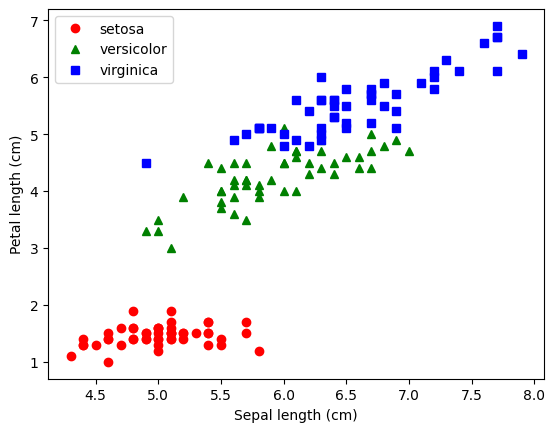

In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, [0, 2]] # 꽃받침의 길이와 꽃잎의 길이
y = iris.target

plt.plot(X[:,0][y==0], X[:,1][y==0], "ro", label='setosa')
plt.plot(X[:,0][y==1], X[:,1][y==1], "g^", label='versicolor')
plt.plot(X[:,0][y==2], X[:,1][y==2], "bs", label='virginica')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')
plt.legend()
plt.show()

### Bagging 예제 

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
bag_clf = BaggingClassifier(dt_clf, n_estimators=500)    # bagging classifier 실행 
bag_clf.fit(X_train, y_train)

for clf in (dt_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: \
    {accuracy_score(y_test,y_pred):.4f}")

DecisionTreeClassifier:     0.9211
BaggingClassifier:     0.9211


### make moons 데이터 준비 

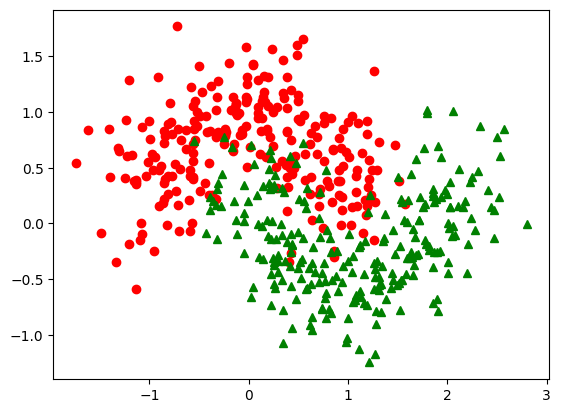

In [10]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.show()

#### Bagging 예제2

In [11]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

dt_clf = DecisionTreeClassifier()     # DecisionTree classifier 실행
bag_clf = BaggingClassifier(dt_clf, n_estimators=500)
bag_clf.fit(X_train, y_train)

for clf in (dt_clf, bag_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{clf.__class__.__name__}: \
    {accuracy_score(y_test,y_pred):.4f}")

DecisionTreeClassifier:     0.9040
BaggingClassifier:     0.9280


### 랜덤 포레스트 

In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = RandomForestClassifier(n_estimators=500)     # randomforest classifier 실행
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"{clf.__class__.__name__}: {accuracy_score(y_test,y_pred):.4f}")

RandomForestClassifier: 0.8720


---

## 부스팅(Boosting)

#### 여러 개의 분류기가 순차적으로 학습을 수행 
#### 이전 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행

### AdaBoost 

#### 오차보정을 위해 데이터들에 가중치를 부여하면서 동작

#### AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0,random_state=None)
#### -  base_estimator: 약분류기 {None이면 DecisionTreeClassifier(max_depth=1)}
#### -  n_estimators: 생성할 약분류기의 개수
#### -  learning_rate: 학습률(0~1) {약분류기(Weak learner)가 순차적으로 오류 값을 보정해 나갈 때 적용하는 계수}

In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.1) 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"{clf.__class__.__name__}:{accuracy_score(y_test,y_pred):.4f}")

AdaBoostClassifier:0.8880


### Gradienet Boosting Machine (GBM)

####  AdaBoost처럼 매 반복 마다 샘플의 가중치를 조정하는 대신에 이전 예측기가 만든 잔여 오차를 예측하는 새로운 예측기를 만들고 학습

#### GradientBoostingClassifier(loss='deviance’, learning_rate=0.1, n_estimators=100, subsample=1.0)
#### - loss: 경사하강법에서 사용할 비용함수
#### - learning_rate: 학습률(0~1) {약분류기(Weak learner)가 순차적으로 오류 값을 보정해 나갈 때 적용하는 계수}
#### -  n_estimators: 생성할 약분류기의 개수
#### -  subsample: 학습에 사용할 샘플의 비율

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"{clf.__class__.__name__}: {accuracy_score(y_test,y_pred):.4f}")

GradientBoostingClassifier: 0.9040


### XGBoost

#### GBM의 과적합 문제, 속도의 문제와 같은 여러 단점을 보완하기 위한 모델

#### class xgboost.XGBClassifier(*, objective='binary:logistic’, use_label_encoder=True, **kwargs)
#### - max_depth: 트리의 깊이
#### - learning_rate: 학습률(0~1) {약분류기(Weak learner)가 순차적으로 오류 값을 보정해 나갈 때 적용하는 계수}
#### -  n_estimators: 생성할 약분류기의 개수
#### -  subsample: 학습에 사용할 샘플의 비율

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = XGBClassifier(n_estimators=200, learning_rate=0.1)  #n_estimators : 생성할 약 분류기의 개수, learning_rate : 학습률 
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"{clf.__class__.__name__}: {accuracy_score(y_test,y_pred):.4f}")

XGBClassifier: 0.8960


### LightGBM

#### XGBoost의 느린 학습시간을 보완하기 위한 모델

#### LGBMClassifier(max_depth=-1, learning_rate=0.1, n_estimators=100, min_child_samples=20, subsample=1.0, n_jobs=-1)
#### - max_depth: 트리의 깊이
#### - learning_rate: 학습률(0~1) {약분류기(Weak learner)가 순차적으로 오류 값을 보정해 나갈 때 적용하는 계수}
#### -  n_estimators: 생성할 약분류기의 개수
#### -  subsample: 학습에 사용할 샘플의 비율
#### -  n_jobs: 쓰레드(thread)의 개수

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = LGBMClassifier(n_estimators=200, learning_rate=0.1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"{clf.__class__.__name__}:{accuracy_score(y_test,y_pred):.4f}")


LGBMClassifier:0.9040
